# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0

# initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Score: 0.0
Episode 1	Average Score: 0.00Score: -1.0
Episode 2	Average Score: -0.50Score: -1.0
Episode 3	Average Score: -0.67Score: 0.0
Episode 4	Average Score: -0.50Score: 2.0
Episode 5	Average Score: 0.00Score: 1.0
Episode 6	Average Score: 0.17Score: 2.0
Episode 7	Average Score: 0.43Score: -1.0
Episode 8	Average Score: 0.25Score: 0.0
Episode 9	Average Score: 0.22Score: 0.0
Episode 10	Average Score: 0.20Score: 0.0
Episode 11	Average Score: 0.18Score: 0.0
Episode 12	Average Score: 0.17Score: 3.0
Episode 13	Average Score: 0.38Score: -1.0
Episode 14	Average Score: 0.29Score: 0.0
Episode 15	Average Score: 0.27Score: 1.0
Episode 16	Average Score: 0.31Score: -1.0
Episode 17	Average Score: 0.24Score: 1.0
Episode 18	Average Score: 0.28Score: 2.0
Episode 19	Average Score: 0.37Score: -1.0
Episode 20	Average Score: 0.30Score: 0.0
Episode 21	Average Score: 0.29Score: 0.0
Episode 22	Average Score: 0.27Score: 1.0
Episode 23	Average Score: 0.30Score: -1.0
Episode 24	Average Score: 0.25Score: 1.0
Epis

Episode 198	Average Score: 4.99Score: 10.0
Episode 199	Average Score: 5.03Score: 8.0
Episode 200	Average Score: 5.09
Score: 5.0
Episode 201	Average Score: 5.14Score: 9.0
Episode 202	Average Score: 5.22Score: 5.0
Episode 203	Average Score: 5.22Score: 5.0
Episode 204	Average Score: 5.21Score: 10.0
Episode 205	Average Score: 5.29Score: 13.0
Episode 206	Average Score: 5.39Score: 5.0
Episode 207	Average Score: 5.42Score: 8.0
Episode 208	Average Score: 5.47Score: 6.0
Episode 209	Average Score: 5.50Score: 5.0
Episode 210	Average Score: 5.50Score: 8.0
Episode 211	Average Score: 5.55Score: 7.0
Episode 212	Average Score: 5.57Score: 0.0
Episode 213	Average Score: 5.52Score: 5.0
Episode 214	Average Score: 5.50Score: 8.0
Episode 215	Average Score: 5.52Score: 9.0
Episode 216	Average Score: 5.57Score: 9.0
Episode 217	Average Score: 5.62Score: 9.0
Episode 218	Average Score: 5.65Score: 8.0
Episode 219	Average Score: 5.66Score: 8.0
Episode 220	Average Score: 5.72Score: 2.0
Episode 221	Average Score: 5.7

Episode 577	Average Score: 13.62Score: 13.0
Episode 578	Average Score: 13.63Score: 20.0
Episode 579	Average Score: 13.71Score: 14.0
Episode 580	Average Score: 13.71Score: 11.0
Episode 581	Average Score: 13.67Score: 16.0
Episode 582	Average Score: 13.67Score: 17.0
Episode 583	Average Score: 13.69Score: 10.0
Episode 584	Average Score: 13.72Score: 19.0
Episode 585	Average Score: 13.86Score: 14.0
Episode 586	Average Score: 13.82Score: 20.0
Episode 587	Average Score: 13.89Score: 13.0
Episode 588	Average Score: 13.86Score: 19.0
Episode 589	Average Score: 13.95Score: 19.0
Episode 590	Average Score: 14.02Score: 15.0
Episode 591	Average Score: 14.01Score: 17.0
Episode 592	Average Score: 14.07Score: 19.0
Episode 593	Average Score: 14.13Score: 19.0
Episode 594	Average Score: 14.21Score: 17.0
Episode 595	Average Score: 14.27Score: 17.0
Episode 596	Average Score: 14.28Score: 13.0
Episode 597	Average Score: 14.29Score: 13.0
Episode 598	Average Score: 14.27Score: 13.0
Episode 599	Average Score: 14.25

Episode 949	Average Score: 15.10Score: 18.0
Episode 950	Average Score: 15.09Score: 16.0
Episode 951	Average Score: 15.05Score: 15.0
Episode 952	Average Score: 15.05Score: 11.0
Episode 953	Average Score: 15.00Score: 17.0
Episode 954	Average Score: 15.01Score: 16.0
Episode 955	Average Score: 15.02Score: 17.0
Episode 956	Average Score: 15.09Score: 8.0
Episode 957	Average Score: 15.01Score: 12.0
Episode 958	Average Score: 14.95Score: 18.0
Episode 959	Average Score: 15.04Score: 8.0
Episode 960	Average Score: 14.91Score: 15.0
Episode 961	Average Score: 14.96Score: 9.0
Episode 962	Average Score: 14.84Score: 21.0
Episode 963	Average Score: 14.95Score: 6.0
Episode 964	Average Score: 14.88Score: 18.0
Episode 965	Average Score: 15.00Score: 12.0
Episode 966	Average Score: 15.00Score: 14.0
Episode 967	Average Score: 15.00Score: 17.0
Episode 968	Average Score: 15.08Score: 8.0
Episode 969	Average Score: 15.06Score: 17.0
Episode 970	Average Score: 15.10Score: 16.0
Episode 971	Average Score: 15.17Score

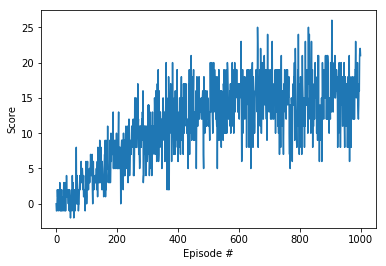

In [14]:
def train_agent(n_episodes=1000, max_t=1500, eps_start=1.0, eps_end=0.01, eps_decay=0.995):    
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=21.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores    
    
agent = Agent(state_size=37, action_size=4, seed=0)
scores = train_agent()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [6]:
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

NameError: name 'agent' is not defined

In [7]:
agent = Agent(state_size=37, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))


env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0

# initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 13.0
